# We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway in the USA.

John Hogue made the dataset available, it can be downloaded from the UCI Machine Learning Repository.

 - The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.
___


First, let's import our libraries & explore our data:
___

In [1]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns, re
%matplotlib inline

o_df = pd.read_csv(r'Metro_Interstate_Traffic_Volume.csv' , encoding="ISO-8859-1")
print(o_df.shape)
print(o_df.info())
o_df

(48204, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


___
let's explore the traffic volume throughout the history of the recorded data:
___

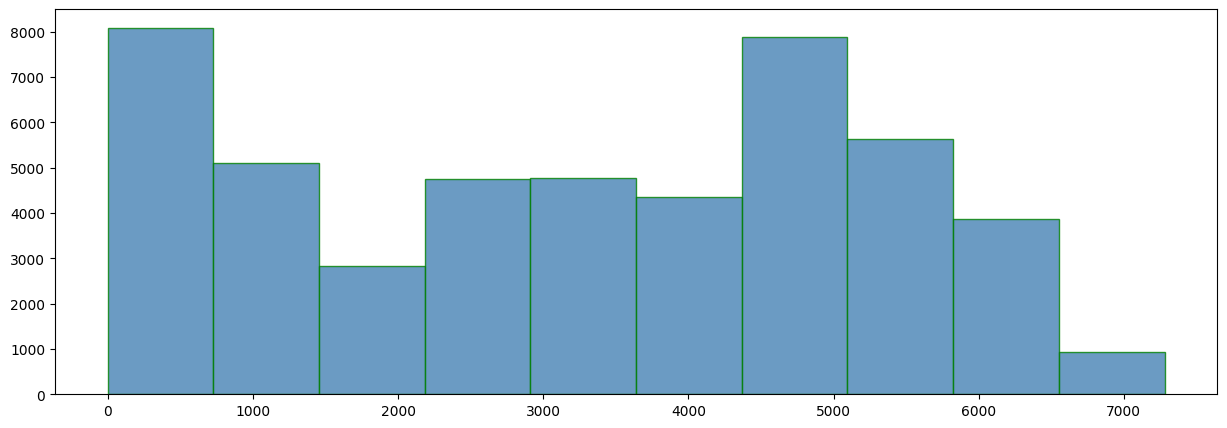

In [2]:
plt.subplots(figsize=(15, 5))

plt.hist(o_df['traffic_volume'], alpha=.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.show()

___
Now let's look at the difference in traffic volume during daytime vs. nighttime
___

In [3]:
o_df.date_time.describe()

count                   48204
unique                  40575
top       2013-05-19 10:00:00
freq                        6
Name: date_time, dtype: object

Observations:
--
- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).  

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)  

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [4]:
o_df.date_time = pd.to_datetime(o_df['date_time'])

day = o_df.copy()[(o_df.date_time.dt.hour.between(7,19))]
print(day.shape)

night = o_df.copy()[(o_df['date_time'].dt.hour >= 19) | (o_df['date_time'].dt.hour < 7)]
print(night.shape)

(25838, 9)
(24327, 9)


Note: This significant difference in row numbers between day and night is due to a few hours of missing data.

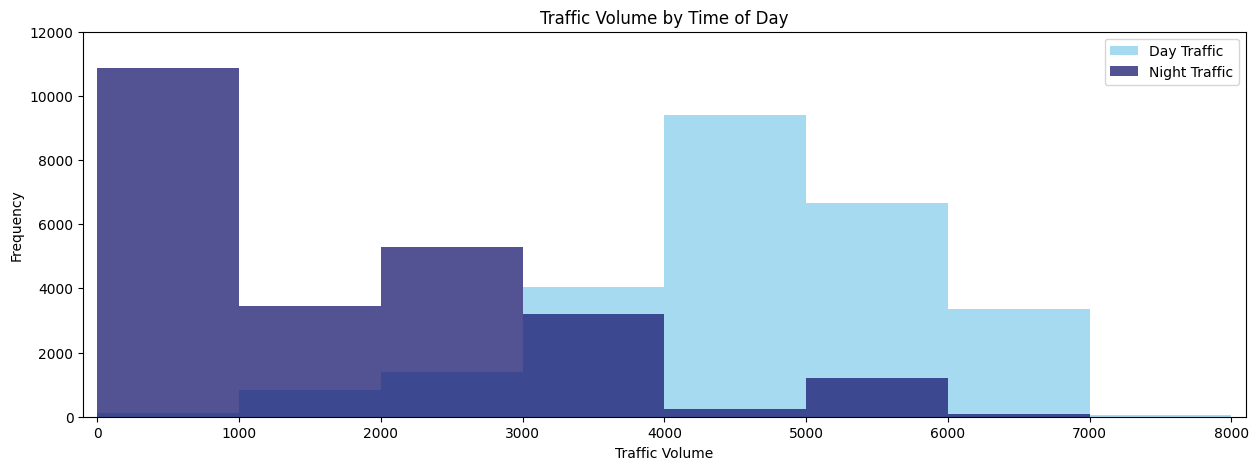

In [5]:
fig, time_of_day = plt.subplots(figsize=(15,5))
time_of_day.set_title('Traffic Volume by Time of Day')
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

time_of_day.hist(day['traffic_volume'], color='skyblue', alpha=.75, label='Day Traffic',bins=bins)
time_of_day.set_xlim(-100, 8100)
time_of_day.set_ylim(0, 12000)
time_of_day.set_ylabel('Frequency')
time_of_day.set_xlabel('Traffic Volume')

time_of_day.hist(night['traffic_volume'], color='midnightblue', alpha=.75, label='Night Traffic',bins=bins)
time_of_day.set_xlim(-100, 8100)
time_of_day.set_ylim(0, 12000)
time_of_day.legend()

In [6]:
day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

# Observations:
The histogram & and the statistical values from the 'describe()' method, show that:
- The distribution of traffic volume during the day is tipped to the right side of the plot, This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).
- The distribution of traffic volume during the night is tipped to the left side of the plot, This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.  

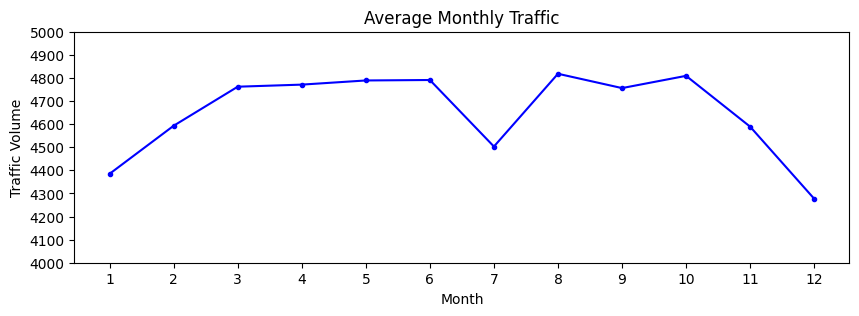

In [8]:
av_monthly_vol = round(day.groupby(day.date_time.dt.month)['traffic_volume'].mean())

plt.figure(figsize=(10,3))
plt.title('Average Monthly Traffic')

plt.plot(av_monthly_vol, 'b.-')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.xticks(list(range(1,13)))
plt.yticks(list(range(4000,5100,100)))

plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?  

To answer the last question, let's see how the traffic volume changed each year in July.

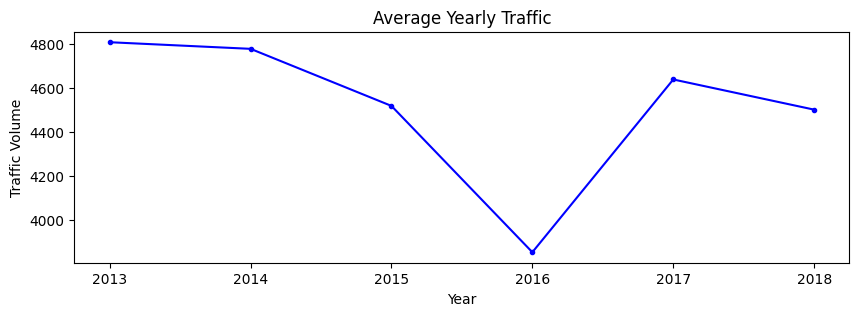

In [9]:
av_yearly_vol = round(day[day.date_time.dt.month == 7].groupby(day.date_time.dt.year)['traffic_volume'].mean())

plt.figure(figsize=(10,3))
plt.title('Average Yearly Traffic')

plt.plot(av_yearly_vol, 'b.-')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.xticks(list(range(2013,2019)))

plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.  

As a conclusion, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

___
Let's now look a step further, where we'll explore the changes in traffic volume according to differet days of the week:
___

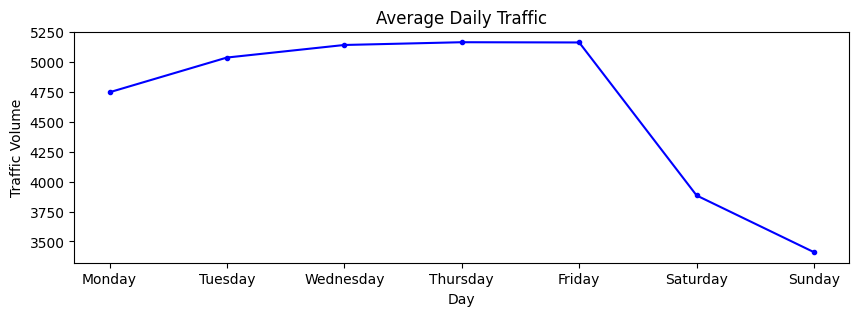

In [10]:
day['week_day'] = day.date_time.apply(lambda x : x.weekday())
av_daily_vol = round(day.groupby('week_day')['traffic_volume'].mean())
days = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']

plt.figure(figsize=(10,3))
plt.title('Average Daily Traffic')

plt.plot(av_daily_vol, 'b.-')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.xticks(ticks = range(7), labels = days)

plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.
___

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [11]:
day['time'] = day.date_time.apply(lambda x : int(x.strftime('%H')))
business_days = round(day.loc[(day.week_day != 6) & (day.week_day != 7), ['time','traffic_volume']].groupby('time')['traffic_volume'].mean())
weekends = round(day.loc[(day.week_day == 6) | (day.week_day == 7), ['time','traffic_volume']].groupby('time')['traffic_volume'].mean())

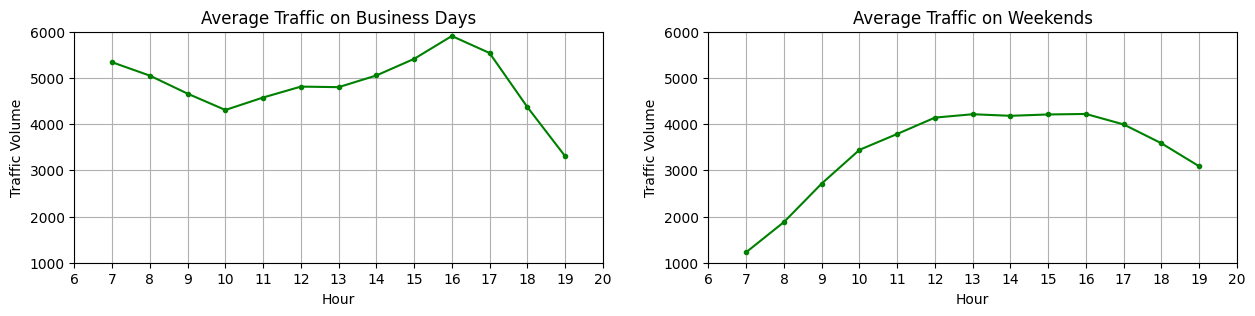

In [20]:
plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
plt.title('Average Traffic on Business Days')
plt.plot(business_days, 'g.-')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(1000,6000)
plt.xticks(range(6,21))
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Average Traffic on Weekends')
plt.plot(weekends, 'g.-')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.ylim(1000,6000)
plt.xticks(range(6,21))
plt.grid()

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.  

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.
___

# Weather Indicators:
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.  

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume:

In [21]:
day.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
week_day         -0.371023
time             -0.007369
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.  

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

c:\Users\Mohamed Suleiman\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


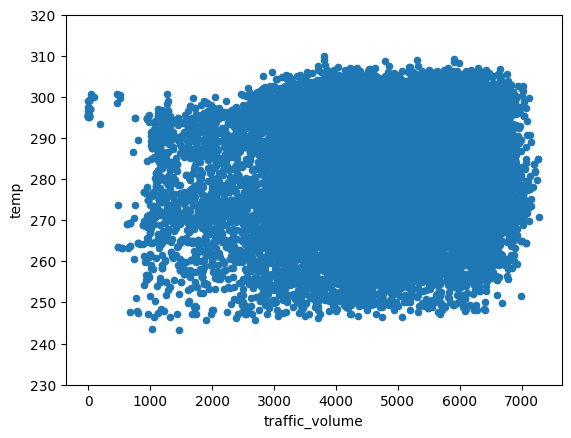

In [22]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.  

Let's now look at the other weather-related columns: weather_main and weather_description:  
To start, we're going to group the data by weather_main and look at the traffic_volume averages:

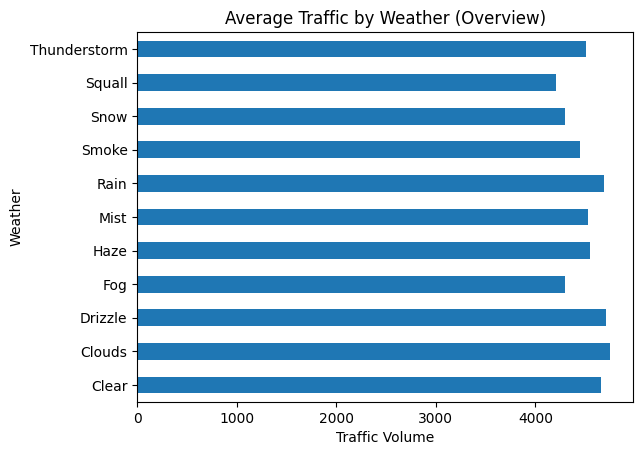

In [39]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.title('Average Traffic by Weather (Overview)')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more detailed weather classification.

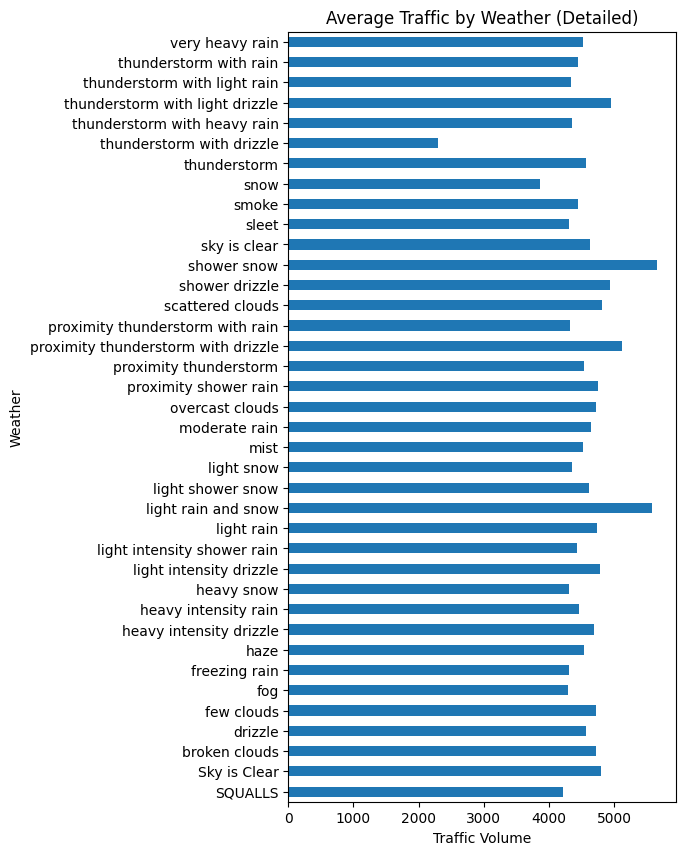

In [48]:
by_weather_description = day.groupby('weather_description').mean()
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Average Traffic by Weather (Detailed)')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle  

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.
___

# Conclusion:

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
  - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  - The traffic is usually heavier on business days compared to the weekends.
  - On business days, the rush hours are around 7 and 16.
- Weather indicators
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle